# Capítulo 3. Algoritmos genéticos.
> Autor: Natalia Cely Callejas, Ronald Arturo Chavez.\
> Universidad Nacional de Colombia  
> Mayo 1, 2025

## Introducción 
Los algoritmos genéticos son herramientas que emulan los ciclos de vida y los comportamientos genétidos de los seres humanos, desarrollados entre 1960 y 1970, describen el flujo de la evolución humana que siguen:
1. Selección. De los organismos (soluciones) más aptos.
2. Mutación. Posibilidad de cambios para mantener la diversidad.
3. Cruce. Las características de los seleccionados se transmiten a la siguiente generación.

Bajo el marco de una serie de reglas que lo condicionan concordantes con la aplicación, así, los Algoritmos genéticos son utilizados para problemas de combinación y optimización, sobretodo en situaciones de altos órdenes o complejidad, cuando no existe una forma directa para abarcarlos. 

## Verdadera Democracia
En este punto se simula una situación política en la que un jefe de gobierno busca repartir el poder político (ministerios, agencias, etc.) entre cinco partidos políticos que conforman el congreso, de forma proporcional a la representación que cada uno tiene (medida en curules).

In [7]:
import random
from collections import Counter

# -----------------------------
# Paso 1: Distribuir curules no uniformemente
# -----------------------------

partidos = ['A', 'B', 'C', 'D', 'E']
curules = random.choices(partidos, weights=[0.3, 0.25, 0.2, 0.15, 0.1], k=50)
recuento_curules = Counter(curules)
print("Curules por partido:", recuento_curules)

# -----------------------------
# Paso 2: Generar entidades y pesos políticos
# -----------------------------

entidades = [{'nombre': f'Entidad_{i+1}', 'peso': random.randint(1, 100)} for i in range(50)]
print("\nEjemplo de entidades y pesos:")
for e in entidades[:5]:
    print(e)

# -----------------------------
# Paso 3: Crear un individuo aleatorio
# -----------------------------

def crear_individuo():
    return [random.randint(0, 4) for _ in range(50)]

# -----------------------------
# Paso 4: Función de fitness
# -----------------------------

def calcular_fitness(individuo, entidades, recuento_curules):
    poder_partidos = [0] * 5
    for i, partido_idx in enumerate(individuo):
        poder_partidos[partido_idx] += entidades[i]['peso']

    total_poder = sum([e['peso'] for e in entidades])
    poder_ideal = [recuento_curules[p] / 50 * total_poder for p in partidos]

    error = sum((poder_partidos[i] - poder_ideal[i])**2 for i in range(5))
    return 1 / (1 + error)

# -----------------------------
# Paso 5: Algoritmo genético
# -----------------------------

def algoritmo_genetico(entidades, recuento_curules, n_generaciones=100, poblacion_size=100):
    poblacion = [crear_individuo() for _ in range(poblacion_size)]

    for _ in range(n_generaciones):
        fitness_scores = [calcular_fitness(ind, entidades, recuento_curules) for ind in poblacion]

        seleccionados = random.choices(poblacion, weights=fitness_scores, k=poblacion_size)

        nueva_poblacion = []
        for i in range(0, poblacion_size, 2):
            padre1 = seleccionados[i]
            padre2 = seleccionados[i+1]

            punto = random.randint(1, 49)
            hijo1 = padre1[:punto] + padre2[punto:]
            hijo2 = padre2[:punto] + padre1[punto:]

            if random.random() < 0.1:
                hijo1[random.randint(0, 49)] = random.randint(0, 4)
            if random.random() < 0.1:
                hijo2[random.randint(0, 49)] = random.randint(0, 4)

            nueva_poblacion.extend([hijo1, hijo2])

        poblacion = nueva_poblacion

    fitness_scores = [calcular_fitness(ind, entidades, recuento_curules) for ind in poblacion]
    mejor_idx = fitness_scores.index(max(fitness_scores))
    return poblacion[mejor_idx]

# -----------------------------
# Paso 6: Ejecutar y mostrar resultado
# -----------------------------

solucion = algoritmo_genetico(entidades, recuento_curules)

# Evaluar distribución final
asignacion_poder = [0] * 5
for i, partido_idx in enumerate(solucion):
    asignacion_poder[partido_idx] += entidades[i]['peso']

print("\nDistribución final del poder político:")
for i, p in enumerate(partidos):
    print(f"Partido {p}: {asignacion_poder[i]} puntos de poder")



Curules por partido: Counter({'A': 14, 'B': 14, 'C': 12, 'D': 7, 'E': 3})

Ejemplo de entidades y pesos:
{'nombre': 'Entidad_1', 'peso': 29}
{'nombre': 'Entidad_2', 'peso': 13}
{'nombre': 'Entidad_3', 'peso': 61}
{'nombre': 'Entidad_4', 'peso': 50}
{'nombre': 'Entidad_5', 'peso': 18}

Distribución final del poder político:
Partido A: 660 puntos de poder
Partido B: 668 puntos de poder
Partido C: 559 puntos de poder
Partido D: 324 puntos de poder
Partido E: 135 puntos de poder


## Optimización de despacho de energía en relación con los costos de transporte
La situación estudiada es la siguiente:
> Una empresa proveedora de energía eléctrica dispone de 4 plantas de generación para satisfacer la demanda diaria de energía eléctrica en Cali, Bogotá, Medellín y Barranquilla. Cada una puede generar 3, 6, 5 y 4 GW al día respectivamente. Las necesidades de Cali, Bogotá, Medellín y Barranquilla son de 4, 3, 5 y 3 GW al día respectivamente. Lo costos por el transporte de energía por cada GW entre plantas y ciudades se dan en la siguente tabla:


|        |Cali|Bogotá|Medellín|Barranquilla|
|--------|----|------|--------|------------|
|Planta A|1   |4     |3       |6           |
|Planta B|4   |1     |4       |5           |
|Planta C|3   |4     |1       |4           |
|Planta D|6   |5     |4       |1           |

> Y los costos de $KW-H$ por generador se dan en la siguiente tabla:

|Generador | KW-H |
|----------|------|
|Planta A  | 680  |
|Planta B  | 720  |
|Planta C  | 660  |
|Planta D  | 750  |

Para poder encontrar el mejor despacho de energía por medio de algortimos genéticos se crea el siguiente programa:

In [11]:
#Importe de librerías necesarias
import random
import math
import numpy as np

#Creación de matrices con el enunciado
plantas = ['A', 'B', 'C', 'D']
ciudades = ['Cali', 'Bogotá', 'Medellín', 'Barranquilla']

capacidad_plantas = [3, 6, 5, 4]  # GW máximos por planta
demanda_ciudades = [4, 3, 5, 3]   # GW requeridos por ciudad

costos_transporte = np.array([
    [1, 4, 3, 6],  # Planta A
    [4, 1, 4, 5],  # Planta B
    [3, 4, 1, 4],  # Planta C
    [6, 5, 4, 1]   # Planta D
])
costos_generacion = [680, 720, 660, 750]  # $ por KW-H

#Parámetros para el algoritmo genético
p_mut=0.1 #Probabilidad de mutación, estática
M=100 #Numero de generaciones
p_size=30 #Población

#Definición de funciones AG
# -----------------------------
# Paso 1: Generación de la población
# -----------------------------
# Crear un individuo (16 genes: energía enviada de cada planta a cada ciudad)
def crear_individuo():
    individuo = np.zeros((4,4), dtype=int)
    # Inicialización respetando las demandas y capacidades
    demanda_restante = demanda_ciudades.copy()
    capacidad_restante = capacidad_plantas.copy()
    for j in range(4):  # Para cada ciudad
        for i in range(4):  # Para cada planta
            max_envio = min(capacidad_restante[i], demanda_restante[j])
            envio = random.randint(0, max_envio)
            individuo[i][j] = envio
            capacidad_restante[i] -= envio
            demanda_restante[j] -= envio
    return individuo

# -----------------------------
# Paso 2: Evaluación de aptitud
# -----------------------------
def calcular_costo(individuo):
    costo_total = 0
    for i in range(4):
        for j in range(4):
            energia = individuo[i][j]
            costo_transp = energia * costos_transporte[i][j] * 1000  # Convertir a KW-H
            costo_gen = energia * 1000 * costos_generacion[i]
            costo_total += costo_transp + costo_gen
    penalizacion = 0
    # Penalizar si la demanda no se cumple o se supera la capacidad
    demanda_satisfecha = individuo.sum(axis=0)
    capacidad_usada = individuo.sum(axis=1)
    for j in range(4):
        penalizacion += abs(demanda_satisfecha[j] - demanda_ciudades[j]) * 1e6
    for i in range(4):
        if capacidad_usada[i] > capacidad_plantas[i]:
            penalizacion += (capacidad_usada[i] - capacidad_plantas[i]) * 1e6
    return costo_total + penalizacion

# -----------------------------
# Paso 3: Selección por torneo
# -----------------------------
def seleccion(poblacion, costos):
    elegidos = []
    mejor_indice = np.argmin(costos)
    elegidos.append(poblacion[mejor_indice])  # El mejor siempre se selecciona
    while len(elegidos) < len(poblacion):
        a, b = random.sample(range(len(poblacion)), 2)
        if costos[a] < costos[b]:
            elegidos.append(poblacion[a])
        else:
            elegidos.append(poblacion[b])
    return elegidos

# -----------------------------
# Paso 4: Cruce
# -----------------------------
def cruce(p1, p2):
    punto = random.randint(0, 15)
    hijo = np.zeros((4,4), dtype=int)
    flat_p1 = p1.flatten()
    flat_p2 = p2.flatten()
    flat_hijo = np.concatenate((flat_p1[:punto], flat_p2[punto:]))
    hijo = flat_hijo.reshape((4,4))
    return hijo

# -----------------------------
# Paso 5: Mutación
# -----------------------------
def mutacion(individuo):
    for i in range(4):
        for j in range(4):
            if random.random() < p_mut:
                max_envio = min(capacidad_plantas[i], demanda_ciudades[j])
                individuo[i][j] = random.randint(0, max_envio)
    return individuo


# -----------------------------
# Rutina general
# -----------------------------
poblacion = [crear_individuo() for _ in range(p_size)]
for gen in range(M):
    costos = [calcular_costo(ind) for ind in poblacion]
    mejores = seleccion(poblacion, costos)
    nueva_poblacion = []
    for i in range(0, p_size, 2):
        hijo1 = cruce(mejores[i], mejores[i+1])
        hijo2 = cruce(mejores[i+1], mejores[i])
        nueva_poblacion.append(mutacion(hijo1))
        nueva_poblacion.append(mutacion(hijo2))
    poblacion = nueva_poblacion
    # if (gen+1)%10==0:
        # print(f"Generación {gen+1} - Mejor costo: {min(costos):,.2f}")

# Resultado final
costos_finales = [calcular_costo(ind) for ind in poblacion]
mejor_solucion = poblacion[np.argmin(costos_finales)]
print("\nMejor despacho de energía:")
print(mejor_solucion)
print(f"Costo total: {min(costos_finales):,.2f}")

#Enunciado final
print("\nDetalle del mejor despacho encontrado:\n")

for i, planta in enumerate(plantas):
    for j, ciudad in enumerate(ciudades):
        energia = mejor_solucion[i][j]
        if energia > 0:
            costo_t = energia * costos_transporte[i][j] * 1000  # Costo transporte en $ por GW convertido a KW-H
            costo_g = energia * 1000 * costos_generacion[i]      # Costo generación en $
            costo_total = costo_t + costo_g
            print(f"Planta {planta} suministra {energia} GW a {ciudad} - Transporte: ${costo_t:,.2f} - Generación: ${costo_g:,.2f} - Total: ${costo_total:,.2f}")



Mejor despacho de energía:
[[0 2 0 1]
 [1 1 2 1]
 [1 0 1 1]
 [2 0 2 0]]
Costo total: 10,680,000.00

Detalle del mejor despacho encontrado:

Planta A suministra 2 GW a Bogotá - Transporte: $8,000.00 - Generación: $1,360,000.00 - Total: $1,368,000.00
Planta A suministra 1 GW a Barranquilla - Transporte: $6,000.00 - Generación: $680,000.00 - Total: $686,000.00
Planta B suministra 1 GW a Cali - Transporte: $4,000.00 - Generación: $720,000.00 - Total: $724,000.00
Planta B suministra 1 GW a Bogotá - Transporte: $1,000.00 - Generación: $720,000.00 - Total: $721,000.00
Planta B suministra 2 GW a Medellín - Transporte: $8,000.00 - Generación: $1,440,000.00 - Total: $1,448,000.00
Planta B suministra 1 GW a Barranquilla - Transporte: $5,000.00 - Generación: $720,000.00 - Total: $725,000.00
Planta C suministra 1 GW a Cali - Transporte: $3,000.00 - Generación: $660,000.00 - Total: $663,000.00
Planta C suministra 1 GW a Medellín - Transporte: $1,000.00 - Generación: $660,000.00 - Total: $661,000.00

# Validación con imágenes
Para crear una población de 50 matrices de 120 por 180, con números de 0 a 255 y convertirla en una gráfica RGB con validación por medio de una imagen se crea el siguiente código.

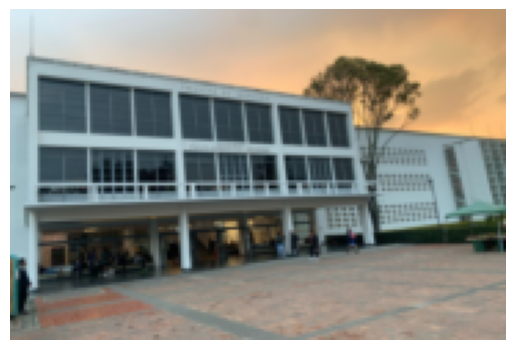

Generación 0, mejor score: -8620.71


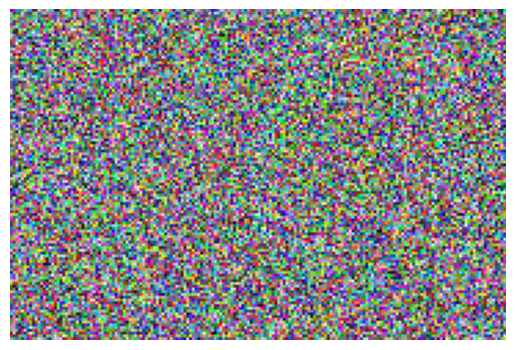

Generación 1000, mejor score: -6572.30


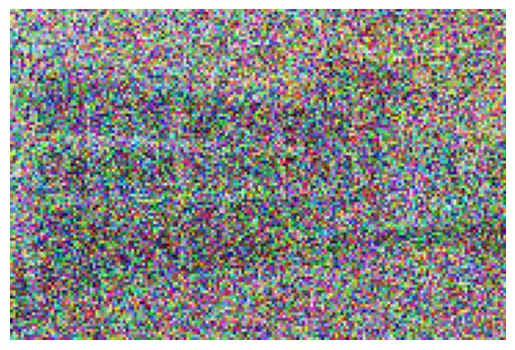

Generación 2000, mejor score: -5401.56


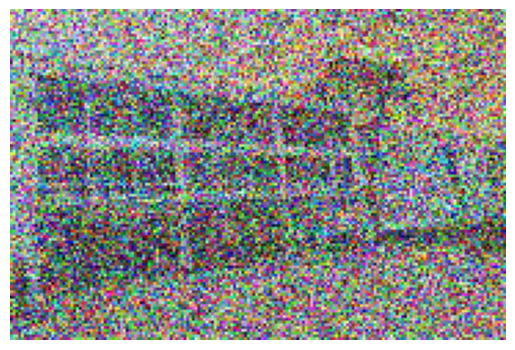

Generación 3000, mejor score: -4507.19


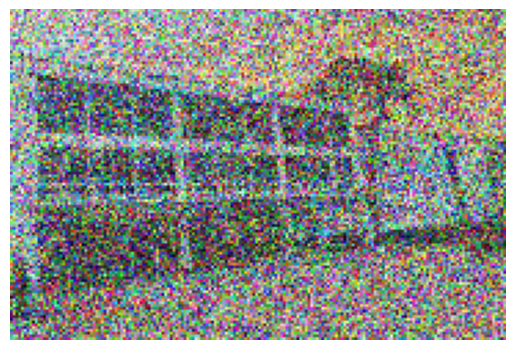

Generación 4000, mejor score: -3825.68


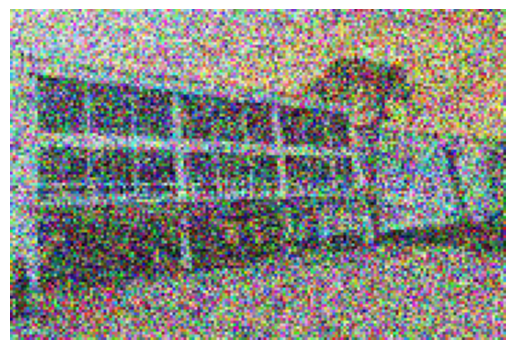

Generación 5000, mejor score: -3300.02


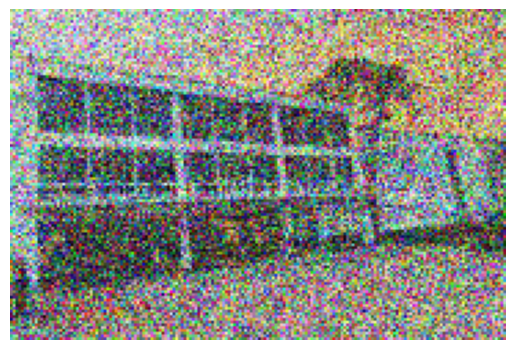

Generación 6000, mejor score: -2895.76


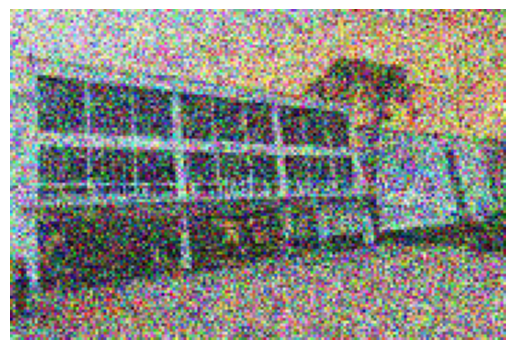

Generación 7000, mejor score: -2576.80


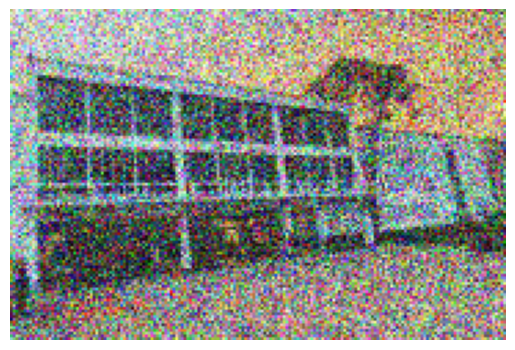

Generación 8000, mejor score: -2328.51


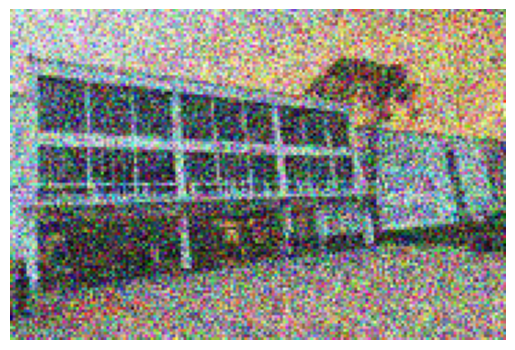

Generación 9000, mejor score: -2119.77


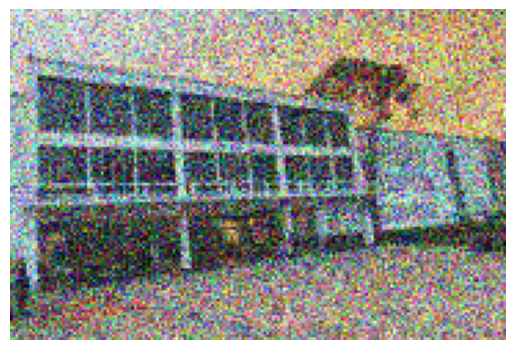

Generación 10000, mejor score: -1966.37


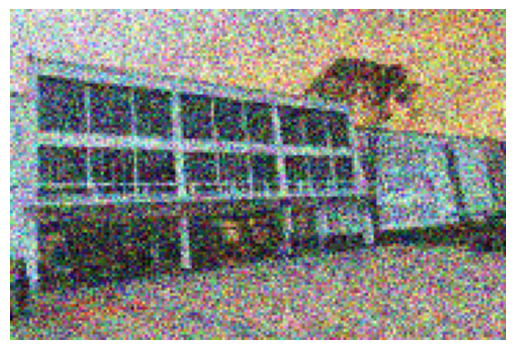

Generación 11000, mejor score: -1829.49


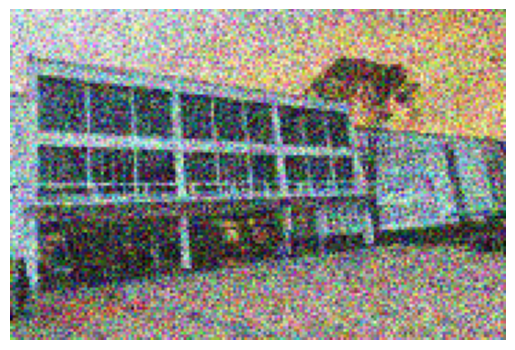

Generación 12000, mejor score: -1719.69


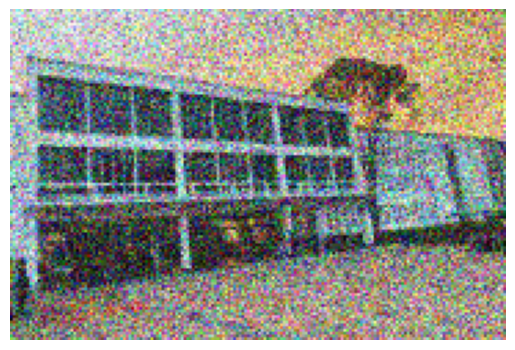

Generación 13000, mejor score: -1629.21


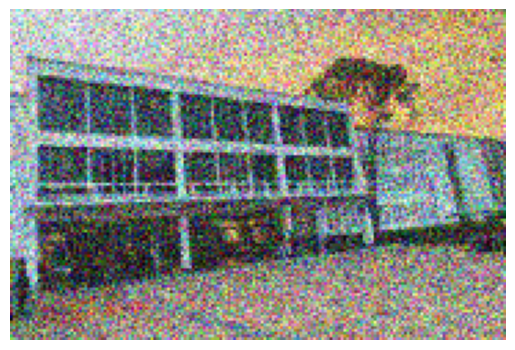

Resultado final alcanzado


In [9]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize  # para redimensionar la imagen

# Parámetros del ejercicio
n=50
limInf=0
limSup=255
length=120
rows=180

# Extra para el final del ciclo
mejor_score_anterior=-20000

#-----
# Mostrar la imagen utilizando matplotlib
#----
def mostrar_imagen(imagen):
    plt.imshow(imagen)
    plt.axis("off")
    plt.show()

# ----
# Cargar la imagen objetivo
# ----
def cargar_objetivo(ruta_imagen, alto=120, ancho=180):
    img = mpimg.imread(ruta_imagen)# Cargar imagen
    if img.max() <= 1.0:# Asegurar que está en [0, 255] como uint8
        img = (img * 255).astype(np.uint8)
    else:
        img = img.astype(np.uint8)
    img_resized = resize(img, (alto, ancho), preserve_range=True, anti_aliasing=True).astype(np.uint8)# Redimensionar al tamaño deseado
    return img_resized

#-----
# Generación de las matrices
#----
def Generator(n,length,rows):
    return np.random.randint(0, 256, size=(n, length, rows, 3), dtype=np.uint8)

# ---
# Función de aptitud
# ---
def aptitud(individuo, objetivo):
    # Combinación MSE + nitidez (mejora detalle visual)
    mse = np.mean((individuo.astype(np.float32) - objetivo.astype(np.float32))**2)
    return -mse 


# ---
# Función de cruce
# ---
def cruzar(padre1, padre2):
    mascara = np.random.randint(0, 2, size=padre1.shape, dtype=bool)
    hijo = np.where(mascara, padre1, padre2)
    return hijo

# ---
# Función de mutación
# ---
def mutar(individuo, tasa=0.0001):
    mutacion = np.random.rand(*individuo.shape) < tasa
    valores = np.random.randint(0, 256, size=individuo.shape)
    individuo[mutacion] = valores[mutacion]
    return individuo


#-----
#Main
#----
poblacion=Generator(n,length,rows)
# print(poblacion)
objetivo = cargar_objetivo("Multimedia/Insignia.JPG")
mostrar_imagen(objetivo)

for generacion in range(500*n):
# while  max(puntuaciones)<-1200: #Criterio de aceptación
    puntuaciones = [aptitud(ind, objetivo) for ind in poblacion]
    
    # Selección: los 10 mejores
    mejores_idx = np.argsort(puntuaciones)[-10:]
    elite = [poblacion[i] for i in mejores_idx] #Guarda en elite
    
    # Cruza para formar nueva población
    nueva_pob = []
    while len(nueva_pob) < len(poblacion):
        padres = random.choices(elite, k=2)
        hijo = cruzar(*padres)
        hijo = mutar(hijo)
        nueva_pob.append(hijo)
    
    poblacion = np.array(nueva_pob)

    if generacion % 1000 == 0: #Mostrar cada 1000 iteraciones
        mejor_score_actual=max(puntuaciones)
        print(f"Generación {generacion}, mejor score: {max(puntuaciones):.2f}")
        mostrar_imagen(poblacion[mejores_idx[-1]])

        #Verificación de detención del ciclo
        if abs(mejor_score_actual-mejor_score_anterior)<=100:
            print("Resultado final alcanzado")
            break
        mejor_score_anterior = mejor_score_actual



# Aporte de las herramientas LLM
El uso de una LLM como ChatGPT en este caso facilita la modelación, resolución y comprensión de un problema político complejo mediante inteligencia artificial. Aportando tanto en la parte técnica como en la parte conceptual.
Para la optimización de costos de generación energética, se utilizó ChatGPT, ya que el código de programa sugerido por el capítulo contaba con ciertas redundancias o errores, es por esto que se le preguntó una validación del código alternativo (generado por nosotros) y una comparación entre los resultados para definir mejoras posibles. Adicionalmente, fue utilizado para mejorar la función de aptitud en el caso de las imágenes permitiendo una convergencia más rápida a la solución y la disminución de líneas de código, haciéndolo lo más eficiente posible.


# Conclusiones
Los algoritmos genéticos son herramientas efectivas para resolver problemas de asignación y proporcionalidad compleja. En este caso, permitieron encontrar una distribución del poder político entre partidos que se ajusta de manera óptima a la representación congresional que cada uno posee.

La simulación refleja un escenario realista de gobernabilidad multipartidista, donde el poder debe repartirse de forma equitativa para asegurar la estabilidad política y la cooperación entre actores. Este tipo de modelo puede ser útil en contextos de negociación y toma de decisiones en gobiernos de coalición. El uso de técnicas de inteligencia artificial facilita la toma de decisiones objetivas en problemas sensibles como la distribución del poder, minimizando sesgos humanos al buscar soluciones basadas en criterios matemáticos y proporcionales.

Adicionalmente, los algoritmos genéticos reflejan una forma eficiente de iteración a través de posibles soluciones y su respectivas evoluciones para acercarse a un problema cuya solución no está parametrizada, como los valores RGB en los pixeles de una imagen o la mejor forma de distribución en generación de energía, lo que permite una alternativa para situaciones con soluciones no sistemáticas o de las que no se conoce una ruta a seguir para abarcar más que la denominada "prueba y error"